<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.599131,43.087330,57.860031,0.992718,196.539209,195.087697,1.451513
1,0.0,1.0,82.437922,70.301235,44.318431,-0.171520,206.886068,206.860260,0.025808
2,0.0,2.0,72.699120,68.445818,93.649088,-2.535046,242.258980,244.288998,-2.030018
3,0.0,3.0,98.159318,73.413113,77.790441,-1.753423,257.609449,258.523427,-0.913978
4,0.0,4.0,33.626723,95.526100,50.127059,2.236332,191.516214,190.075926,1.440287
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,92.005982,97.195580,57.977133,0.918019,258.096713,257.003016,1.093697
29996,999.0,26.0,75.597837,50.062937,97.958533,4.287521,237.906828,234.477723,3.429105
29997,999.0,27.0,74.489171,42.562878,79.084196,-3.532230,202.604015,206.621451,-4.017436
29998,999.0,28.0,74.323956,89.366292,22.451567,0.484452,196.626267,195.033865,1.592402


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.599131,43.087330,57.860031,0.992718,196.539209,195.087697,1.451513
1,0.0,1.0,82.437922,70.301235,44.318431,-0.171520,206.886068,206.860260,0.025808
2,0.0,2.0,72.699120,68.445818,93.649088,-2.535046,242.258980,244.288998,-2.030018
3,0.0,3.0,98.159318,73.413113,77.790441,-1.753423,257.609449,258.523427,-0.913978
4,0.0,4.0,33.626723,95.526100,50.127059,2.236332,191.516214,190.075926,1.440287
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,92.005982,97.195580,57.977133,0.918019,258.096713,257.003016,1.093697
29996,999.0,26.0,75.597837,50.062937,97.958533,4.287521,237.906828,234.477723,3.429105
29997,999.0,27.0,74.489171,42.562878,79.084196,-3.532230,202.604015,206.621451,-4.017436
29998,999.0,28.0,74.323956,89.366292,22.451567,0.484452,196.626267,195.033865,1.592402


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.599131  43.087330  57.860031  ...  196.539209  195.087697  1.451513
      1.0    82.437922  70.301235  44.318431  ...  206.886068  206.860260  0.025808
      2.0    72.699120  68.445818  93.649088  ...  242.258980  244.288998 -2.030018
      3.0    98.159318  73.413113  77.790441  ...  257.609449  258.523427 -0.913978
      4.0    33.626723  95.526100  50.127059  ...  191.516214  190.075926  1.440287
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   92.005982  97.195580  57.977133  ...  258.096713  257.003016  1.093697
      26.0   75.597837  50.062937  97.958533  ...  237.906828  234.477723  3.429105
      27.0   74.489171  42.562878  79.084196  ...  202.604015  206.621451 -4.017436
      28.0   74.323956  89.366292  22.451567  ...  196.626267  195.033865  1.592402
      29.0   34.276291  72.357621  83.274481  ...  200.468753  199.793204  0.675548

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.599131  43.087330  57.860031  ...  196.539209  195.087697  1.451513
      1.0    82.437922  70.301235  44.318431  ...  206.886068  206.860260  0.025808
      2.0    72.699120  68.445818  93.649088  ...  242.258980  244.288998 -2.030018
      3.0    98.159318  73.413113  77.790441  ...  257.609449  258.523427 -0.913978
      4.0    33.626723  95.526100  50.127059  ...  191.516214  190.075926  1.440287
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   92.005982  97.195580  57.977133  ...  258.096713  257.003016  1.093697
      26.0   75.597837  50.062937  97.958533  ...  237.906828  234.477723  3.429105
      27.0   74.489171  42.562878  79.084196  ...  202.604015  206.621451 -4.017436
      28.0   74.323956  89.366292  22.451567  ...  196.626267  195.033865  1.592402
      29.0   34.276291  72.357621  83.274481  ...  200.468753  199.793204  0.675548

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.599131,43.087330,57.860031,0.992718,196.539209,195.087697,1.451513
1,0.0,1.0,82.437922,70.301235,44.318431,-0.171520,206.886068,206.860260,0.025808
2,0.0,2.0,72.699120,68.445818,93.649088,-2.535046,242.258980,244.288998,-2.030018
3,0.0,3.0,98.159318,73.413113,77.790441,-1.753423,257.609449,258.523427,-0.913978
4,0.0,4.0,33.626723,95.526100,50.127059,2.236332,191.516214,190.075926,1.440287
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,92.005982,97.195580,57.977133,0.918019,258.096713,257.003016,1.093697
29996,999.0,26.0,75.597837,50.062937,97.958533,4.287521,237.906828,234.477723,3.429105
29997,999.0,27.0,74.489171,42.562878,79.084196,-3.532230,202.604015,206.621451,-4.017436
29998,999.0,28.0,74.323956,89.366292,22.451567,0.484452,196.626267,195.033865,1.592402


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    84.599131  43.087330  57.860031  ...  196.539209  195.087697  1.451513
      1.0    82.437922  70.301235  44.318431  ...  206.886068  206.860260  0.025808
      2.0    72.699120  68.445818  93.649088  ...  242.258980  244.288998 -2.030018
      3.0    98.159318  73.413113  77.790441  ...  257.609449  258.523427 -0.913978
      4.0    33.626723  95.526100  50.127059  ...  191.516214  190.075926  1.440287
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   92.005982  97.195580  57.977133  ...  258.096713  257.003016  1.093697
      26.0   75.597837  50.062937  97.958533  ...  237.906828  234.477723  3.429105
      27.0   74.489171  42.562878  79.084196  ...  202.604015  206.621451 -4.017436
      28.0   74.323956  89.366292  22.451567  ...  196.626267  195.033865  1.592402
      29.0   34.276291  72.357621  83.274481  ...  200.468753  199.793204  0.675548

[30000 rows x 7 columns]

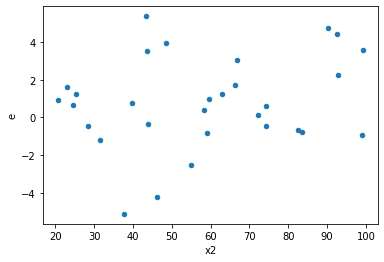

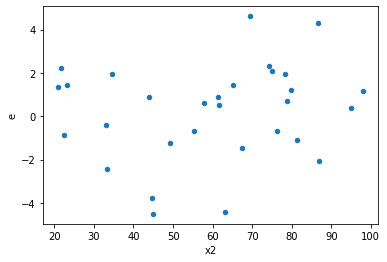

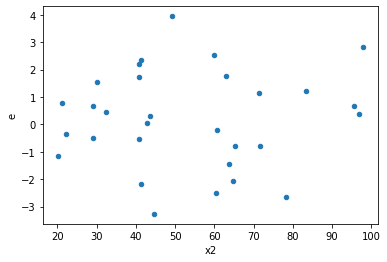

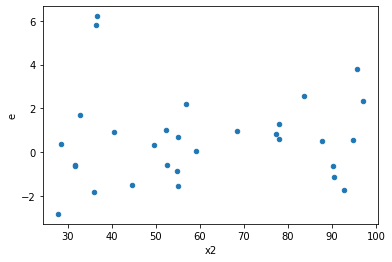

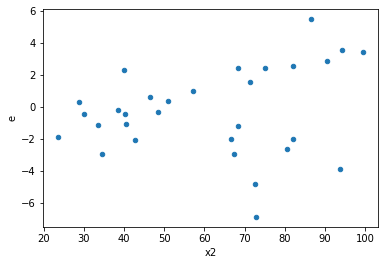

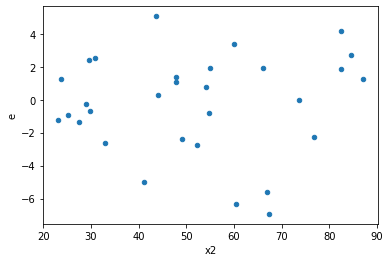

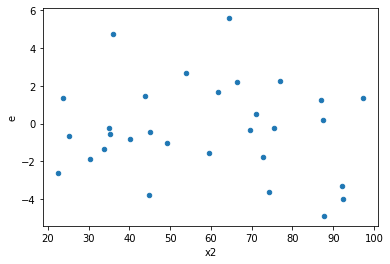

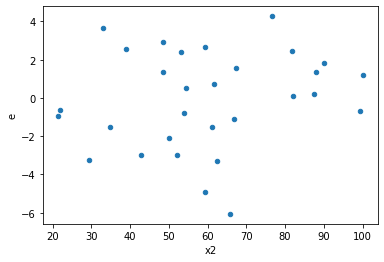

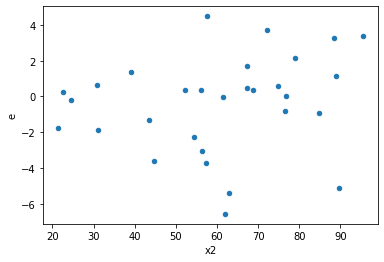

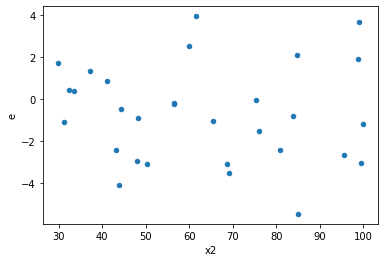

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,9.0,24.27661430192468,46.125662709768804,2.6974015891027423,5.125073634418756,1.900003935314485,0.35297571775414704,0.8235121411229265,0.17648785887707352,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,15.913520014002103,48.711907839005114,1.7681688904446782,5.412434204333902,3.0610391538857606,0.11102591508361215,0.9444870424581939,0.055512957541806074,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,14.332131779623356,83.29189721817255,1.5924590866248174,9.254655246463617,5.811549774932465,0.01510624404244476,0.9924468779787776,0.00755312202122238,Reject005=0 : Heteroscedasticity
12.0,9.0,9.0,15.672730749715537,20.57885456753263,1.7414145277461708,2.2865393963925147,1.313035672989287,0.6915518106549334,0.6542240946725333,0.3457759053274667,Reject005=1 : Homoscedasticity
14.0,9.0,9.0,19.472685157952206,108.50060168868127,2.1636316842169117,12.055622409853475,5.571938374629966,0.017444675332302317,0.9912776623338488,0.008722337666151159,Reject005=0 : Heteroscedasticity
15.0,9.0,9.0,64.47831703206724,149.89025456185834,7.164257448007471,16.65447272909537,2.3246613972153285,0.22485284829074415,0.8875735758546279,0.11242642414537207,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,47.732701193954284,49.95452866045112,5.3036334659949205,5.550503184494569,1.0465472812332324,0.9470784564994916,0.5264607717502542,0.4735392282497458,Reject005=1 : Homoscedasticity
18.0,9.0,9.0,23.928450609142622,59.9606889746791,2.65871673434918,6.662298774964345,2.5058324901224163,0.1873681005215766,0.9063159497392117,0.0936840502607883,Reject005=1 : Homoscedasticity
20.0,9.0,9.0,42.49642347071002,109.68833545527485,4.721824830078891,12.187592828363872,2.5811192212651917,0.17399387121994203,0.913003064390029,0.08699693560997102,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,39.30154507315393,26.95872854849053,4.366838341461548,2.9954142831656143,0.6859457687556786,0.58341211283563,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,34.473703091385175,32.09290201917017,3.830411454598353,3.5658780021300185,0.930938632675932,0.9168541162079276,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,25.51326871685266,20.390933603244804,2.834807635205851,2.2656592892494225,0.7992285829598806,0.7439399594564899,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,24.27661430192468,46.125662709768804,2.6974015891027423,5.125073634418756,1.900003935314485,0.35297571775414704,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,45.08992287501282,28.354729669164602,5.00999143055698,3.150525518796067,0.6288484845663321,0.5003980791336357,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,26.86113673858682,24.828673745545455,2.9845707487318687,2.758741527282828,0.9243344385302328,0.9086188565572144,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,15.913520014002103,48.711907839005114,1.7681688904446782,5.412434204333902,3.0610391538857606,0.11102591508361215,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,41.09470356457943,18.764166015694535,4.566078173842159,2.0849073350771707,0.45660789318523876,0.25847666027121646,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,14.332131779623356,83.29189721817255,1.5924590866248174,9.254655246463617,5.811549774932465,0.01510624404244476,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      916
Reject005=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64